In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
df = pd.read_csv("ecommerce.csv")

In [161]:
# taking initial look at data set
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [163]:
# gathering more info on columns in df and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [165]:
# gives you descriptive statistics about each column that is numeric
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


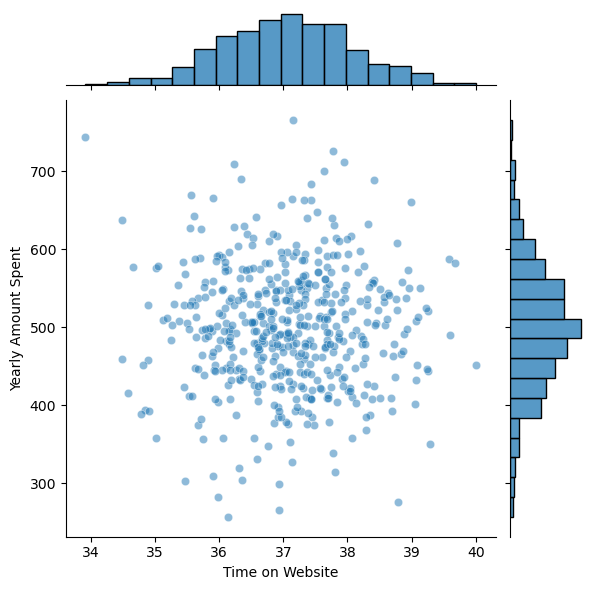

In [167]:
# Doing some EDA
# using jointplot instead of a regular one to see the distribution of each axis

sns.jointplot(x = "Time on Website", y = "Yearly Amount Spent", data = df, alpha = 0.5)

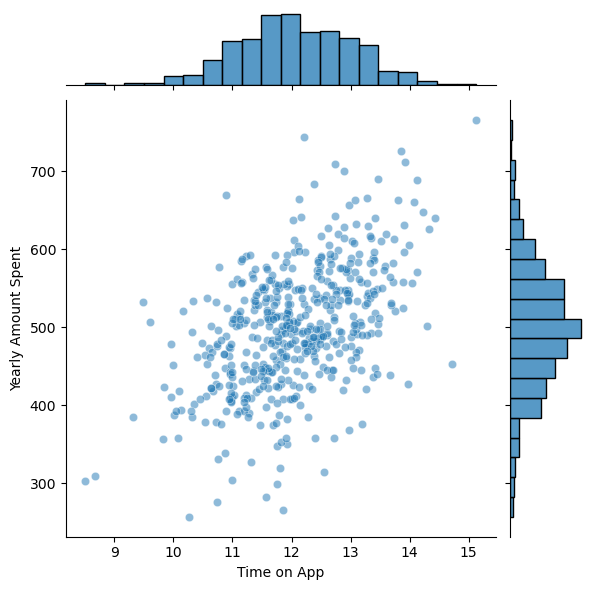

In [168]:
# can see more of a correlation
sns.jointplot(x = "Time on App", y = "Yearly Amount Spent", data = df, alpha = 0.5)

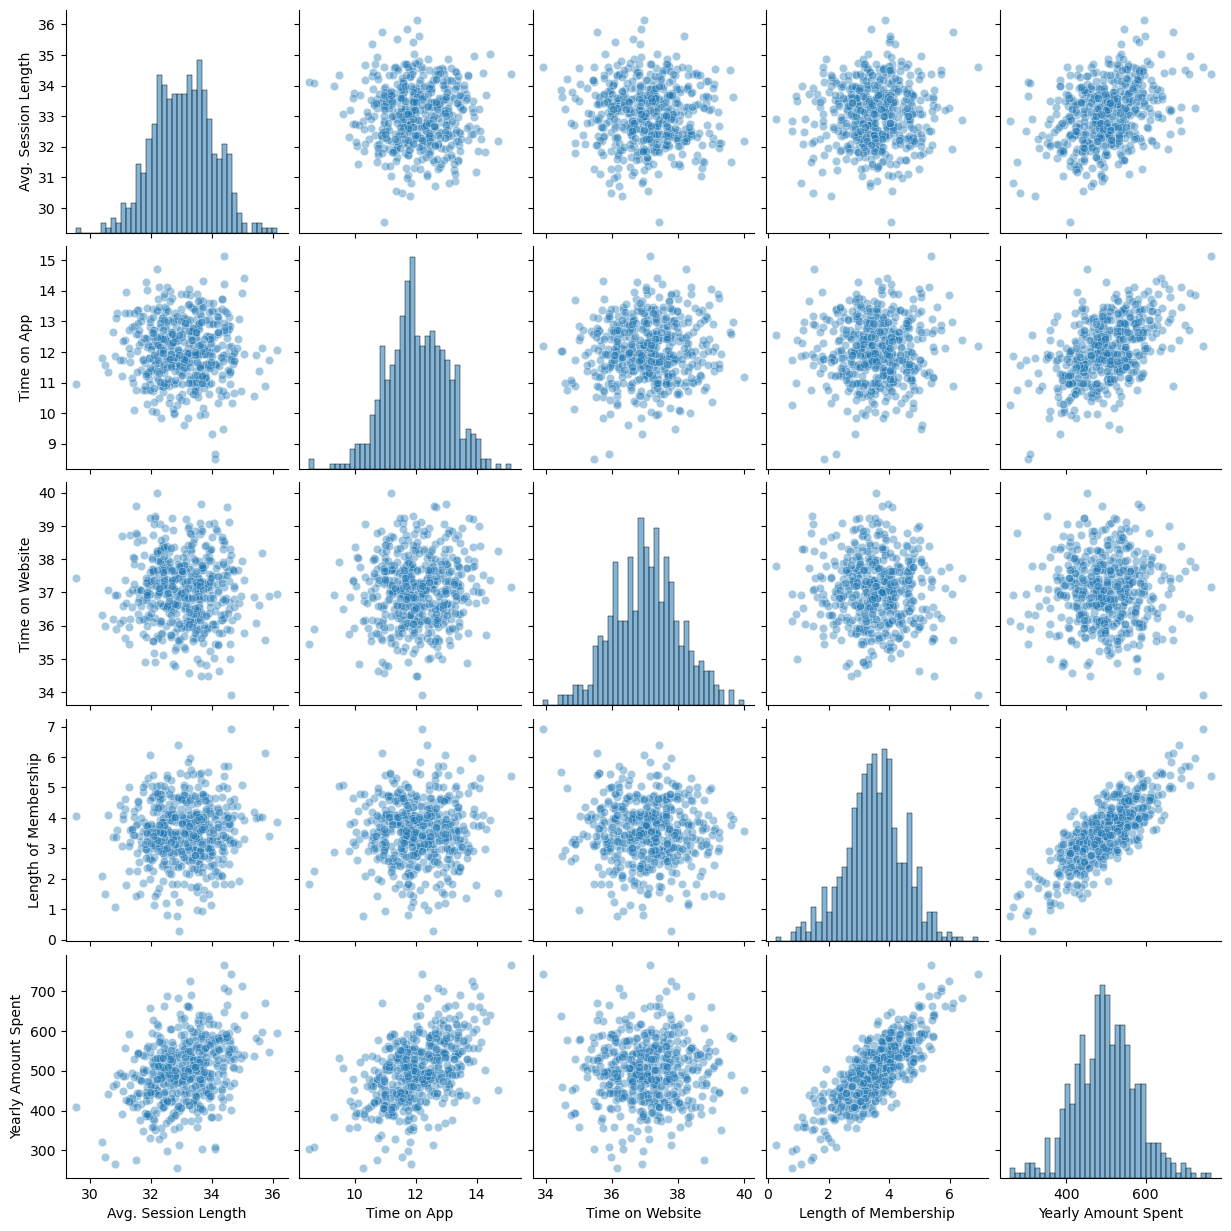

In [211]:
# shows you all different plots of different pairs
# most clear correlation is time of membership and yearly amount spent
sns.pairplot(df, 
             kind = 'scatter', 
             plot_kws = {"alpha": 0.4},
            diag_kws = {"alpha": 0.55, "bins": 40})

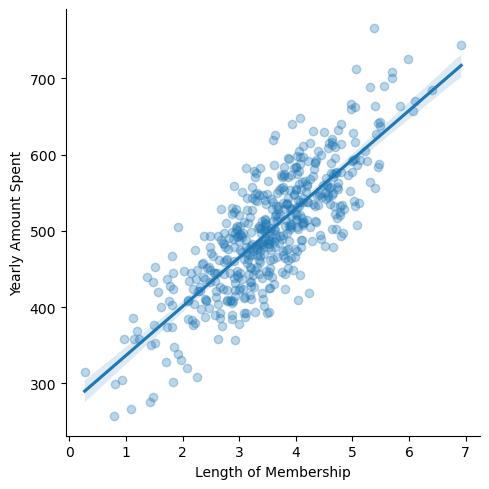

In [172]:
sns.lmplot(x = "Length of Membership",
          y = "Yearly Amount Spent",
          data = df,
          scatter_kws = {"alpha": 0.3})

In [173]:
from sklearn.model_selection import train_test_split

In [221]:
# creating a set with all the predictors without the target variable
# creating a target set with what we want to predict

predictors = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
target = df['Yearly Amount Spent']

In [223]:
# test_size is how much of the data we use to test, and the rest is to train
# random state to ensure results are consistent with the same data
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.3, random_state = 1)

In [225]:
# importing package to train the model
from sklearn.linear_model import LinearRegression

In [227]:
# initializing an instance of the model
lm = LinearRegression()

In [229]:
# training it on the trained part of the split, telling it which target matches which predictors
lm.fit(predictors_train, target_train)

LinearRegression()

In [231]:
lm.coef_

array([25.82792018, 38.80900145,  0.28174274, 61.30479927])

In [233]:
# shows you the 'importance' of each of the predictors when determining the target
cdf = pd.DataFrame(lm.coef_, predictors.columns, columns = ['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.827920
Time on App           38.809001
Time on Website        0.281743
Length of Membership  61.304799


In [235]:
# creating predictions based on the predictors in the test set
predictions = lm.predict(predictors_test)

Text(0.5, 1.0, 'Prediction Evaluation')

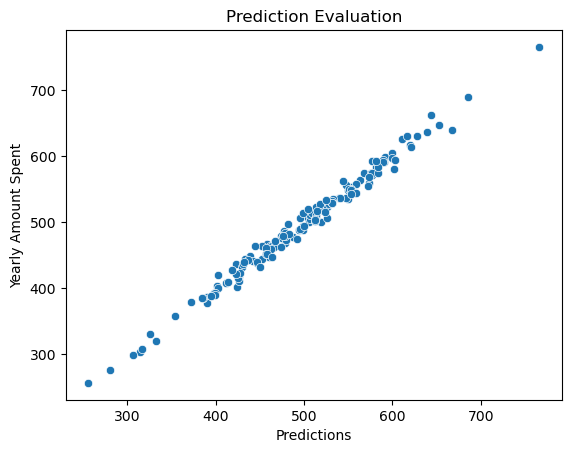

In [237]:
# creating a scatterplot to compare predicted values vs actual ones
# plotted against each other, to see if they match. If corr is 1, then prediction is perfect

sns.scatterplot(x = predictions, y = target_test)
plt.xlabel("Predictions")
plt.title("Prediction Evaluation") 

In [239]:
# importing metrics from sklearn

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [241]:
print("Mean squared error:", mean_squared_error(target_test, predictions))
print("Mean absolute error:", mean_absolute_error(target_test, predictions))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(target_test, predictions)))

Mean squared error: 80.90062369759926
Mean absolute error: 7.099124594093833
Root Mean Squared Error: 8.994477399915976


In [243]:
# residual analysis
# residuals are supposed to be random, as them not being random implies that there is a bias

residuals = target_test - predictions

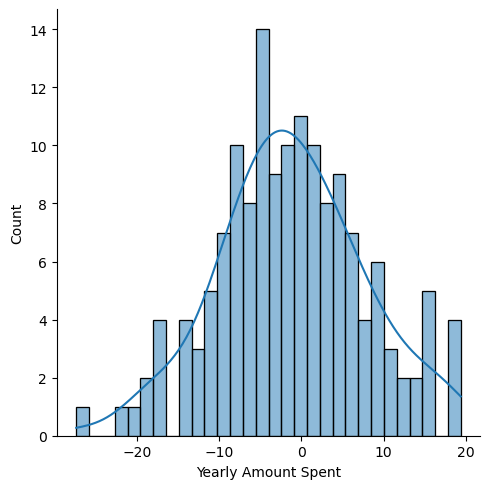

In [250]:
# using a scatterplot to see the different residuals from prediction to actual value
# bins is how many bars there are, which makes you see individual values better, but harder to see distribution
# kde plots a line that will show you what the distribution would be

sns.displot(residuals, bins = 30, kde = True)

In [ ]:
# using a qqplot to see if it is normally distributed
# is it is a 1:1, then it is normally distributed

import pylab
import scipy.stats as stats

stats